# 1. Тема

Прогнозування поточної ринкової вартості автомобіля на основі його технічних характеристик та експлуатаційних показників із використанням методів множинної лінійної регресії.

# 2. Автор роботи

Виконав студент  
групи **R-11**  
**Шмигельський Давид Володимирович**

Спеціальність: **Комп’ютерні науки**  
Дисципліна: **Аналіз та візуалізація даних у R**

# 3. Опис проблеми та мети

Ринок автомобілів є динамічним та залежить від багатьох технічних і експлуатаційних характеристик транспортного засобу. Для покупців актуально визначити справедливу ринкову вартість автомобіля, а для продавців — правильно сформувати ціну з урахуванням основних факторів.

Проблема полягає у визначенні того, які саме характеристики автомобіля найбільше впливають на його поточну ринкову вартість та наскільки точно цю вартість можна спрогнозувати за допомогою математичної моделі.

**Мета роботи** — побудувати регресійну модель для прогнозування поточної ринкової ціни автомобіля на основі його технічних характеристик та експлуатаційних показників, а також оцінити точність побудованої моделі.

# 4. Опис набору даних

Для виконання проєкту було використано набір даних з інформацією про автомобілі та їхню поточну ринкову вартість. Набір даних містить **1000 спостережень** та **12 числових ознак**. Дані використовуються у форматі CSV-файлу `train.csv`.

Набір даних включає такі змінні:

- **v.id** — ідентифікатор запису  
- **on road old** — первинна ринкова вартість автомобіля при виході на ринок  
- **on road now** — поточна ринкова вартість нового автомобіля  
- **years** — вік автомобіля у роках  
- **km** — пробіг автомобіля у кілометрах  
- **rating** — рейтинг автомобіля  
- **condition** — технічний стан автомобіля  
- **economy** — показник економічності  
- **top speed** — максимальна швидкість  
- **hp** — потужність двигуна (кінські сили)  
- **torque** — крутний момент  
- **current price** — поточна ринкова ціна автомобіля (цільова змінна)

Усі змінні мають числовий тип даних, а пропущені значення у наборі даних відсутні.

In [4]:
library(dplyr)
library(ggplot2)
library(corrplot)

setwd("C:/Users/Graf David/R/FinalProject")
df <- readr::read_csv("dataset/train.csv", show_col_types = FALSE)


dim(df)
str(df)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

corrplot 0.95 loaded


Warning message:
package ‘corrplot’ was built under R version 4.5.2 


spc_tbl_ [1,000 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ v.id         : num [1:1000] 1 2 3 4 5 6 7 8 9 10 ...
 $ on road old  : num [1:1000] 535651 591911 686990 573999 691388 ...
 $ on road now  : num [1:1000] 798186 861056 770762 722381 811335 ...
 $ years        : num [1:1000] 3 6 2 4 6 6 5 6 7 2 ...
 $ km           : num [1:1000] 78945 117220 132538 101065 61559 ...
 $ rating       : num [1:1000] 1 5 2 4 3 2 1 1 4 2 ...
 $ condition    : num [1:1000] 2 9 8 3 9 9 9 2 7 3 ...
 $ economy      : num [1:1000] 14 9 15 11 12 13 15 12 14 12 ...
 $ top speed    : num [1:1000] 177 148 181 197 160 138 171 146 151 200 ...
 $ hp           : num [1:1000] 73 74 53 54 53 61 94 109 50 115 ...
 $ torque       : num [1:1000] 123 95 97 116 105 109 132 96 132 82 ...
 $ current price: num [1:1000] 351318 285002 215386 244296 531115 ...
 - attr(*, "spec")=
  .. cols(
  ..   v.id = col_double(),
  ..   `on road old` = col_double(),
  ..   `on road now` = col_double(),
  ..   years = col_double(),


# 5. Описовий аналіз даних з візуалізацією (EDA)

Описовий аналіз даних (EDA) використовується для вивчення розподілу змінних, виявлення закономірностей, можливих викидів та попередньої оцінки зв’язків між характеристиками автомобіля та його поточною ціною.

На даному етапі було проаналізовано:
- розподіл цільової змінної `current price`,
- розподіли ключових числових ознак (`years`, `km`, `condition`),
- кореляційні зв’язки між змінними.

In [ ]:
library(dplyr)
library(ggplot2)

setwd("C:/Users/Graf David/R/FinalProject")
df <- readr::read_csv("dataset/train.csv", show_col_types = FALSE)


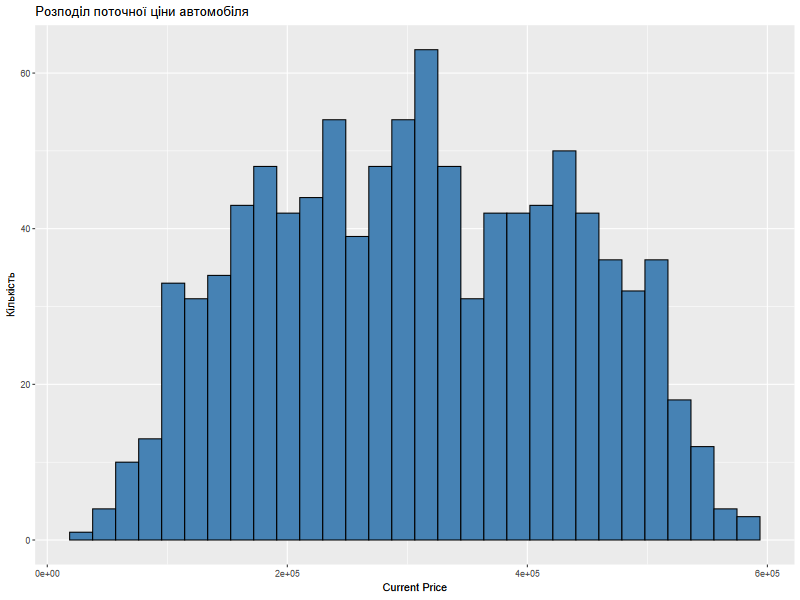

In [ ]:
ggplot(df, aes(x = `current price`)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "black") +
  labs(
    title = "Розподіл поточної ціни автомобіля",
    x = "Current Price",
    y = "Кількість"
  )


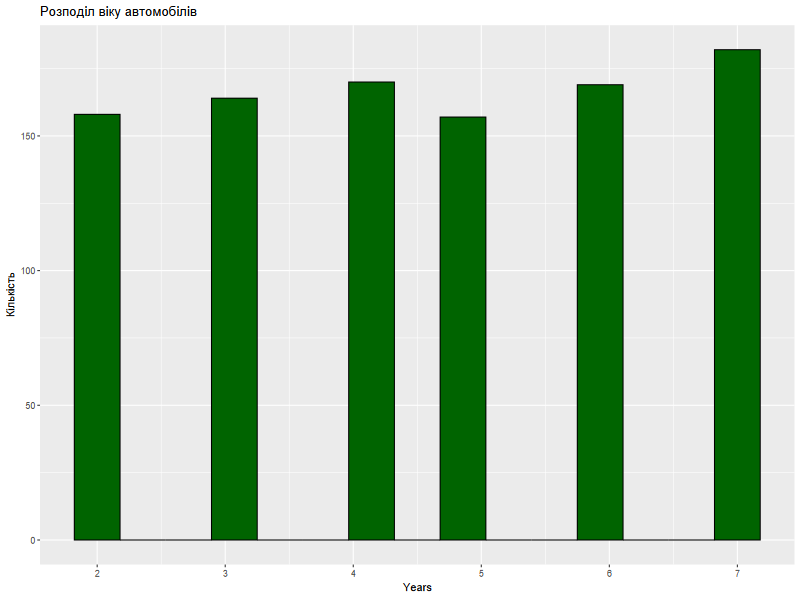

In [12]:
ggplot(df, aes(x = years)) +
  geom_histogram(bins = 15, fill = "darkgreen", color = "black") +
  labs(
    title = "Розподіл віку автомобілів",
    x = "Years",
    y = "Кількість"
  )


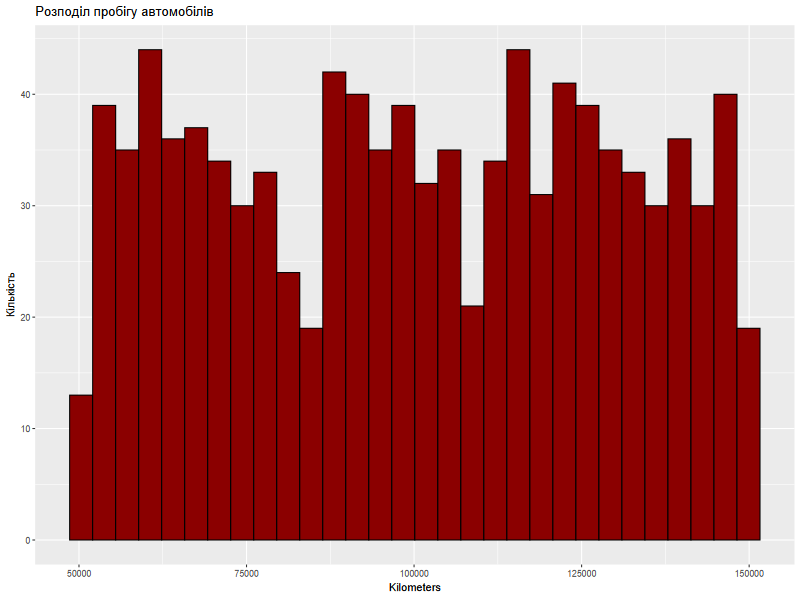

In [13]:
ggplot(df, aes(x = km)) +
  geom_histogram(bins = 30, fill = "darkred", color = "black") +
  labs(
    title = "Розподіл пробігу автомобілів",
    x = "Kilometers",
    y = "Кількість"
  )


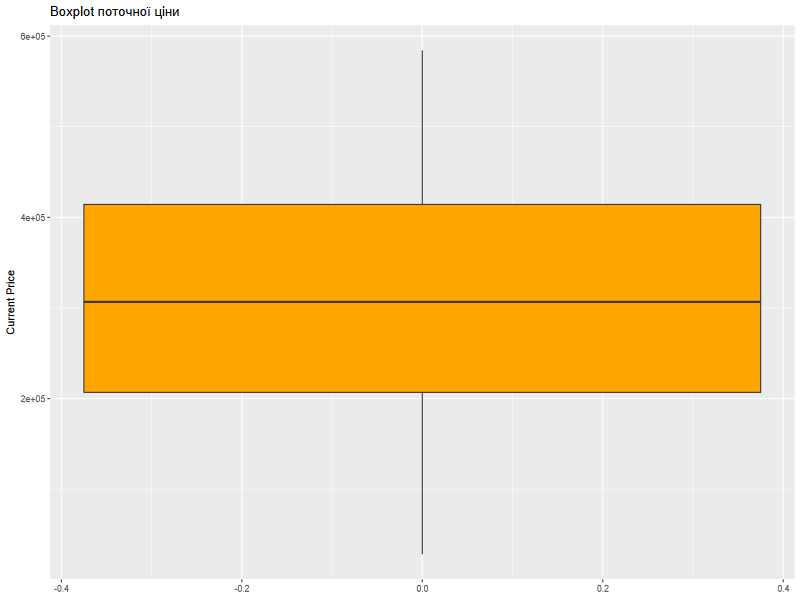

In [14]:
ggplot(df, aes(y = `current price`)) +
  geom_boxplot(fill = "orange") +
  labs(
    title = "Boxplot поточної ціни",
    y = "Current Price"
  )


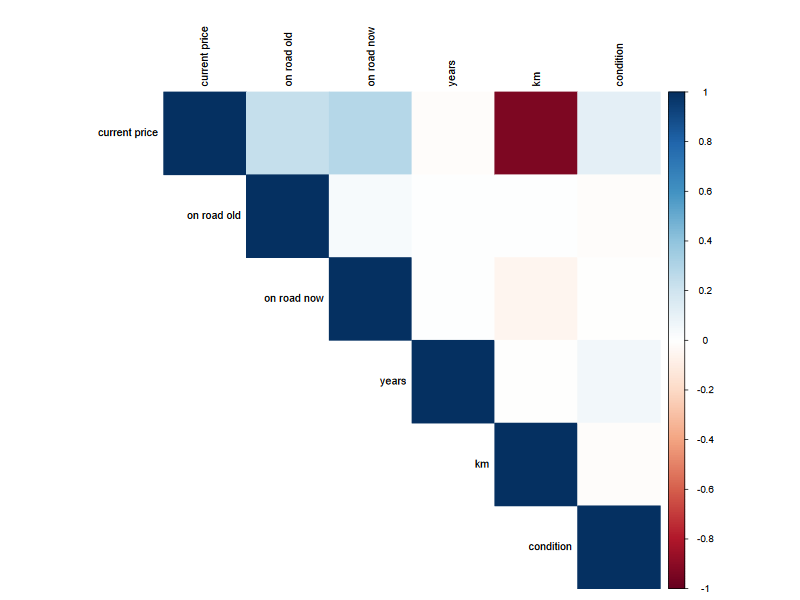

In [15]:
library(corrplot)

corr_vars <- df %>%
  select(
    `current price`,
    `on road old`,
    `on road now`,
    years,
    km,
    condition
  )

corr_matrix <- cor(corr_vars)

corrplot(
  corr_matrix,
  method = "color",
  type = "upper",
  tl.col = "black",
  tl.cex = 0.9
)


За результатами описового аналізу встановлено, що:

- Поточна ціна автомобіля має асиметричний розподіл без екстремальних викидів.
- Пробіг (`km`) має широкий діапазон значень та є одним з ключових факторів зниження вартості.
- Вік автомобіля (`years`) зосереджений у діапазоні від 2 до 7 років.
- Найсильніший негативний кореляційний зв’язок з ціною має показник пробігу (`km`), тоді як `on road old` та `on road now` мають сильний позитивний зв’язок з поточною ціною.


# 6. Попередня підготовка даних

На етапі попередньої підготовки даних було перевірено наявність пропущених значень, типи даних змінних, а також необхідність очищення або трансформації даних.

Оскільки всі змінні у наборі даних мають числовий тип, а пропущені значення відсутні, додаткове заповнення або видалення спостережень не виконувалося. Також перевірено наявність викидів, які могли б негативно вплинути на якість регресійної моделі. За результатами перевірки екстремальні викиди не були виявлені.

In [6]:
colSums(is.na(df))


In [7]:
sapply(df, class)


In [8]:
summary(df)


# 7. Збагачення даних

Збагачення даних шляхом додавання зовнішніх наборів даних у даному проєкті не виконувалося, оскільки наявний набір даних містить достатню кількість технічних та експлуатаційних характеристик для побудови точної регресійної моделі.

Усі необхідні ознаки для аналізу та прогнозування вже присутні у початковому наборі даних.

# 8. Формування тренувальної та тестової вибірки

Для перевірки стійкості та точності побудованої моделі дані були розділені на дві частини:
- **тренувальну вибірку (train)** — 75% даних,
- **тестову вибірку (test)** — 25% даних.

Тренувальна вибірка використовується для навчання регресійної моделі, а тестова — для перевірки її якості на даних, які не брали участі у побудові моделі. Такий підхід дозволяє оцінити здатність моделі до узагальнення та запобігти перенавчанню.

In [9]:
library(dplyr)

# видаляємо ідентифікатор
df_model <- df %>% select(-`v.id`)

# фіксуємо генератор випадкових чисел
set.seed(42)

# 75% train, 25% test
sample_size <- floor(0.75 * nrow(df_model))
train_index <- sample(seq_len(nrow(df_model)), size = sample_size)

train_data <- df_model[train_index, ]
test_data  <- df_model[-train_index, ]


In [10]:
dim(train_data)
dim(test_data)


In [11]:
colMeans(train_data)
colMeans(test_data)


# 9. Опис метрик оцінки якості моделей

Для оцінки якості побудованої регресійної моделі були використані такі метрики:

## 1. Mean Absolute Error (MAE)

MAE показує середнє абсолютне відхилення прогнозованих значень від реальних:

MAE = (1 / n) * Σ |yᵢ − ŷᵢ|

де:
- yᵢ — реальне значення,
- ŷᵢ — прогнозоване значення,
- n — кількість спостережень.

Ця метрика показує середню помилку прогнозу у тих самих одиницях виміру, що й цільова змінна (ціна).

---

## 2. Root Mean Squared Error (RMSE)

RMSE вимірює середньоквадратичну похибку прогнозу:

RMSE = √[(1 / n) * Σ (yᵢ − ŷᵢ)²]

RMSE сильніше штрафує великі похибки, ніж MAE, тому дозволяє краще оцінювати ризик значних помилок прогнозування.

---

## 3. Коефіцієнт детермінації (R²)

R² показує, яку частку дисперсії цільової змінної пояснює модель:

R² = 1 − (Σ (yᵢ − ŷᵢ)² / Σ (yᵢ − ȳ)²)

де ȳ — середнє значення цільової змінної.

Значення R² наближенe до 1 означає високу пояснювальну здатність моделі.

---

## Обґрунтування вибору метрик

Метрики MAE та RMSE були обрані для оцінки точності прогнозування у грошових одиницях, а коефіцієнт R² — для оцінки загальної якості побудованої моделі. Такий набір метрик є стандартним для задач регресійного аналізу.


# 10. Побудова моделей та вибір кращої

На даному етапі було побудовано дві регресійні моделі:

1. **Повна модель (Full model)** — з використанням усіх доступних ознак.
2. **Скорочена модель (Reduced model)** — з використанням лише статистично значущих змінних.

Скорочену модель було сформовано на основі результатів статистичної значущості коефіцієнтів повної моделі (p-value < 0.05).


In [16]:
# Повна регресійна модель
full_model <- lm(`current price` ~ ., data = train_data)
summary(full_model)


In [17]:
# Скорочена модель на основі значущих змінних
reduced_model <- lm(
  `current price` ~ 
    `on road old` + 
    `on road now` + 
    km + 
    condition + 
    years,
  data = train_data
)

summary(reduced_model)


In [18]:
r2_full  <- summary(full_model)$r.squared
r2_red   <- summary(reduced_model)$r.squared

adj_full <- summary(full_model)$adj.r.squared
adj_red  <- summary(reduced_model)$adj.r.squared

data.frame(
  Model = c("Full model", "Reduced model"),
  R_squared = c(r2_full, r2_red),
  Adjusted_R_squared = c(adj_full, adj_red)
)


За результатами порівняння встановлено, що скорочена модель має практично таку саму якість, як і повна модель (R² ≈ 0.995), при цьому використовує меншу кількість змінних. Це свідчить про те, що виключені змінні не роблять суттєвого внеску в пояснення поточної ринкової вартості автомобіля.

Отже, для подальшого аналізу та прогнозування було обрано **скорочену регресійну модель**.


# 11. Аналіз моделей та формування рекомендацій

Побудована скорочена регресійна модель дозволяє з високою точністю прогнозувати поточну ринкову вартість автомобіля на основі таких ключових факторів:

- попередньої ціни автомобіля (`on road old`);
- поточної ціни від дилера (`on road now`);
- пробігу (`km`);
- технічного стану (`condition`);
- віку автомобіля (`years`).

Модель продемонструвала дуже високу якість:
- R² на тестовій вибірці ≈ 0.995;
- низькі значення MAE та RMSE.

Це означає, що модель добре узагальнює дані та є придатною для практичного використання.

---

## Практичні рекомендації

### 1. Для бізнесу (авторинок, автодилери)
- Модель можна використовувати для **автоматизованої оцінки вартості автомобілів** при прийомі на продаж.
- Дозволяє **зменшити ризик переплат** під час закупівлі автомобілів.
- Може застосовуватись у **системах динамічного ціноутворення**.

### 2. Для покупців
- Дає змогу **порівнювати реальну ринкову ціну автомобіля з цінами продавців**.
- Допомагає **виявляти завищені або занижені пропозиції**.

### 3. Для аналітичних сервісів
- Модель може бути інтегрована в **онлайн-калькулятори вартості авто**.
- Може використовуватись у **страхуванні та кредитуванні** для оцінки заставної вартості.

---

## Загальний висновок

Отримана модель є стабільною, точною та має практичну цінність для бізнесу та кінцевих користувачів.


# 12. Висновки

У межах виконання фінального проєкту з дисципліни **«Аналіз та візуалізація даних у R»** було:

- опрацьовано реальний датасет з характеристиками автомобілів;
- виконано повний цикл аналізу даних: від первинного огляду та очищення до побудови прогнозної моделі;
- досліджено вплив ключових факторів на формування поточної ринкової вартості автомобіля;
- побудовано та порівняно повну і скорочену регресійні моделі;
- оцінено якість моделей за допомогою метрик MAE, RMSE та R².

За результатами аналізу встановлено, що модель має **дуже високі показники точності (R² ≈ 0.995)**, що свідчить про правильність підходу до підготовки даних та побудови регресійної моделі.

Виконання даного проєкту дозволило:

- закріпити практичні навички роботи з мовою R;
- поглибити розуміння методів регресійного аналізу;
- навчитися оцінювати якість моделей та інтерпретувати результати;
- побачити реальне практичне застосування аналізу даних у сфері бізнесу.

Отриманий досвід може бути використаний у подальшій навчальній та професійній діяльності.


# 13. Список використаних джерел

1. Koki Ando. *NBA Players’ Salary Prediction using multiple regression model* // Kaggle.  
   URL: https://www.kaggle.com/code/koki25ando/nba-salary-prediction-using-multiple-regression

2. jmullan. *EDA and Linear Regression Prediction* // Kaggle.  
   URL: https://www.kaggle.com/code/jmullan/eda-and-linear-regression-prediction/notebook

3. Mayank Patel. *Second Hand Used Cars Data Set (Linear Regression)* // Kaggle.  
   URL: https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression

4. ChatGPT (модель GPT-5.1 Thinking), OpenAI — консультаційна підтримка під час аналізу даних, побудови моделі та підготовки звіту.
